In [1]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# Data Import

Nothing special, just import all the data into numpy arrays and make them ready for usage.

In [34]:
path_data="mc_z0experiment-main/"

ee_file = uproot.open(path_data+'ee.root')
ee_ttree_name = 'myTTree'
ee_branches = ee_file[ee_ttree_name].arrays()
ee_ctrk = ak.to_numpy(ee_branches.Ncharged)
ee_sump = ak.to_numpy(ee_branches.Pcharged)
ee_ecal = ak.to_numpy(ee_branches.E_ecal)
ee_hcal = ak.to_numpy(ee_branches.E_hcal)

mm_file = uproot.open(path_data+'mm.root')
mm_ttree_name = 'myTTree'
mm_branches = mm_file[mm_ttree_name].arrays()
mm_ctrk = ak.to_numpy(mm_branches.Ncharged)
mm_sump = ak.to_numpy(mm_branches.Pcharged)
mm_ecal = ak.to_numpy(mm_branches.E_ecal)
mm_hcal = ak.to_numpy(mm_branches.E_hcal)

qq_file = uproot.open(path_data+'qq.root')
qq_ttree_name = 'myTTree'
qq_branches = qq_file[qq_ttree_name].arrays()
qq_ctrk = ak.to_numpy(qq_branches.Ncharged)
qq_sump = ak.to_numpy(qq_branches.Pcharged)
qq_ecal = ak.to_numpy(qq_branches.E_ecal)
qq_hcal = ak.to_numpy(qq_branches.E_hcal)

tt_file = uproot.open(path_data+'tt.root')
tt_ttree_name = 'myTTree'
tt_branches = tt_file[tt_ttree_name].arrays()
tt_ctrk = ak.to_numpy(tt_branches.Ncharged)
tt_sump = ak.to_numpy(tt_branches.Pcharged)
tt_ecal = ak.to_numpy(tt_branches.E_ecal)
tt_hcal = ak.to_numpy(tt_branches.E_hcal)

# Histograms

Now plot the data (by propertie and not by particle) and analyse them.

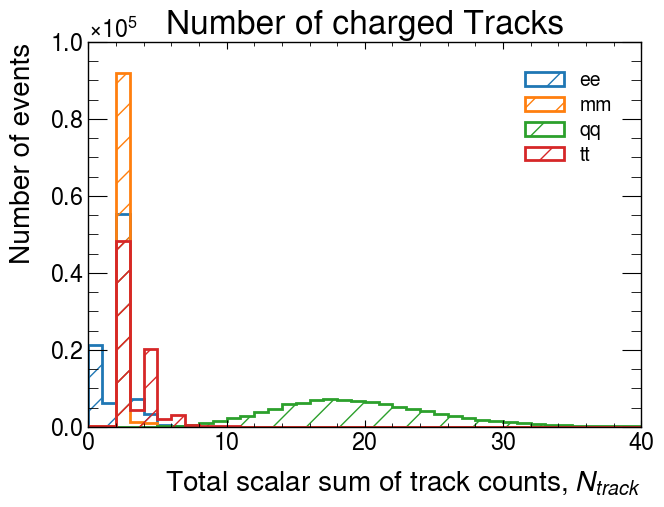

In [184]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bins1 = np.linspace(0,40,41)

plt.hist(ee_ctrk,bins=bins1, histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Number of charged Tracks')
#plt.xlim(0,10)
plt.xlabel('Total scalar sum of track counts, $N_{track}$')
plt.ylabel('Number of events')
plt.legend()
plt.show()

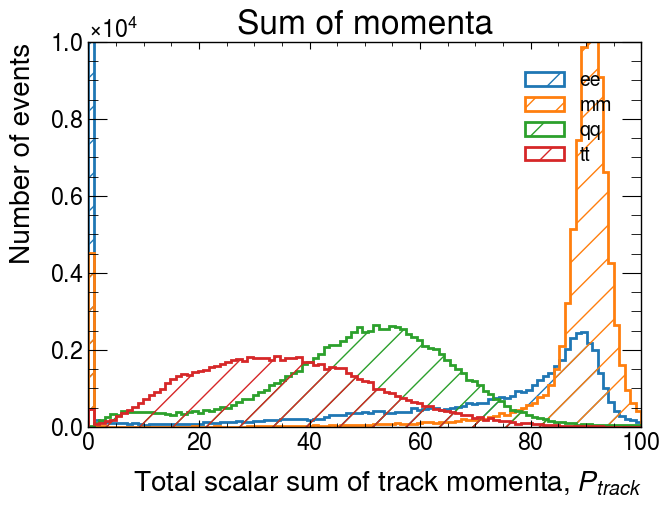

In [309]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

plt.hist(ee_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Sum of momenta')
#plt.xlim(0,20)
plt.xlabel('Total scalar sum of track momenta, $P_{track}$')
plt.ylabel('Number of events')
plt.ylim(0,10000)
plt.legend()
plt.show()

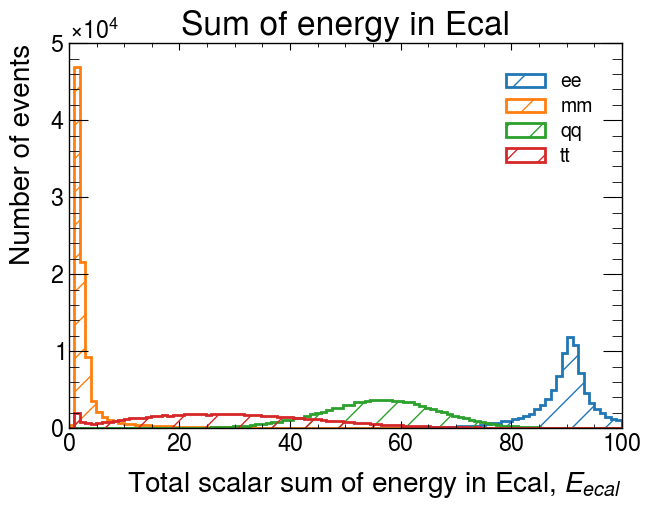

In [262]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

plt.hist(ee_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Sum of energy in Ecal')
#plt.xlim(0,20)
plt.xlabel('Total scalar sum of energy in Ecal, $E_{ecal}$')
plt.ylabel('Number of events')
#plt.ylim(200)
plt.legend()
plt.show()

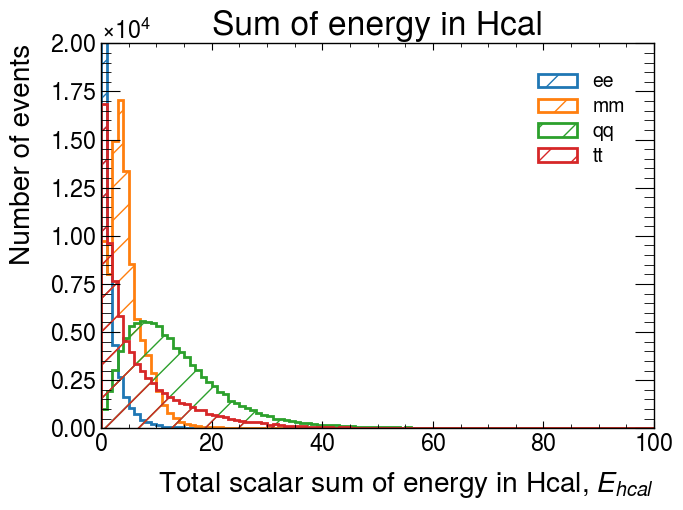

In [329]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bins4 = np.linspace(0,100,101)

plt.hist(ee_hcal,bins=bins4, histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='tt')


plt.title('Sum of energy in Hcal')
#plt.xlim(0,2)
plt.xlabel('Total scalar sum of energy in Hcal, $E_{hcal}$')
plt.ylabel('Number of events')
plt.ylim(0,20000)
plt.legend()
plt.show()

# Particle ID

A collection of several algorithms to do the particle ID.

We use a majority voting system and weights for individual decissions.

IDs:
- qq / Hadronic = 1
- ee = 2
- mm = 3
- tt = 4


In [377]:
def particleID(ctrk,sump,ecal,hcal,details=False):
    had_count =0
    e_count = 0
    m_count = 0
    tau_count = 0
    
    if (8 <= ctrk <= 38): had_count += 1*3
    if (0 <= ctrk <= 4): e_count += 1
    if (2 <= ctrk <= 3): m_count += 1 * 2
    if (2 <= ctrk <= 7): tau_count += 1 * 2
        
    if (0 <= sump <= 80): had_count += 1
    if (0 <= sump <= 1) or (20 <= sump <= 1000): e_count += 1
    if (0 <= sump <= 1) or (70 <= sump <= 1000): m_count += 1 * 1.5
    if (5 <= sump <= 70): tau_count += 1 * 1.5
        
    if (20 <= ecal <= 90): had_count += 1 
    if (70 <= ecal <= 1000): e_count += 1 * 2
    if (1 <= ecal <= 11): m_count += 1
    if (11 <= ecal <= 75): tau_count += 1 
        
    if (3 <= hcal <= 50): had_count += 1
    if (0 <= hcal <= 7): e_count += 1
    if (0 <= hcal <= 14): m_count += 1
    if (0 <= hcal <= 35): tau_count += 1
        
    
    if details:
        print("Hadronic:",had_count,"Electron:",e_count,"Muon:",m_count,"Tau:",tau_count)
        
    return [had_count,e_count,m_count,tau_count]

def array_ID(ctrk,sump,ecal,hcal):
    
    result = []
    for i in range(0,len(ctrk)):
        result.append(particleID(ctrk[i],sump[i],ecal[i],hcal[i]))
    return result

In [378]:
def particle_ID_1234(ctrk,sump,ecal,hcal):
    namelist = []
    spare_list = []
    particle_list = array_ID(ctrk,sump,ecal,hcal)
    for particle in particle_list:
        name = []
        indices = [i for i, x in enumerate(particle) if x == max(particle)]
        if 0 in indices:
            name = 1
        if 1 in indices:
            name = 2
        if 2 in indices:
            name = 3
        if 3 in indices:
            name = 4
        if len(indices) != 1:
            name=0
            spare_list.append(np.array(indices)+1)
        namelist.append(name)
    return [namelist,spare_list]

# Efficency Matrix

In [379]:
def eff(id_array,Errorcounter=False):
    results = np.array([0,0,0,0])
    errors = 0
    for particle in id_array:
        if particle != 0:
            results[particle-1] += 1
        else:
            errors += 1
    
    if Errorcounter:
        print(errors)
    return results

            

In [380]:
id_ee = particle_ID_1234(ee_ctrk,ee_sump,ee_ecal,ee_hcal)[0]
id_qq = particle_ID_1234(qq_ctrk,qq_sump,qq_ecal,qq_hcal)[0]
id_mm = particle_ID_1234(mm_ctrk,mm_sump,mm_ecal,mm_hcal)[0]
id_tt = particle_ID_1234(tt_ctrk,tt_sump,tt_ecal,tt_hcal)[0]

In [381]:
qq_eff = eff(id_qq,Errorcounter = True)
ee_eff = eff(id_ee,Errorcounter = True)
mm_eff = eff(id_mm,Errorcounter = True)
tt_eff = eff(id_tt,Errorcounter = True)

print("qq | ee  | mm |tt")
print(qq_eff/len(id_qq),np.sum(qq_eff)/len(id_qq))
print(ee_eff/len(id_ee),np.sum(ee_eff)/len(id_ee))
print(mm_eff/len(id_mm),np.sum(mm_eff)/len(id_mm))
print(tt_eff/len(id_tt),np.sum(tt_eff)/len(id_tt))

169
72
3
137
qq | ee  | mm |tt
[9.86881487e-01 1.11603746e-04 5.07289754e-05 1.12415409e-02] 0.9982853606322859
[9.59467815e-05 9.70437731e-01 1.06500927e-02 1.80486557e-02] 0.9992324257478519
[1.16548882e-04 1.37739587e-04 9.66614043e-01 3.30998824e-02] 0.9999682139413654
[0.00806676 0.00409019 0.008193   0.97792057] 0.9982705077385311


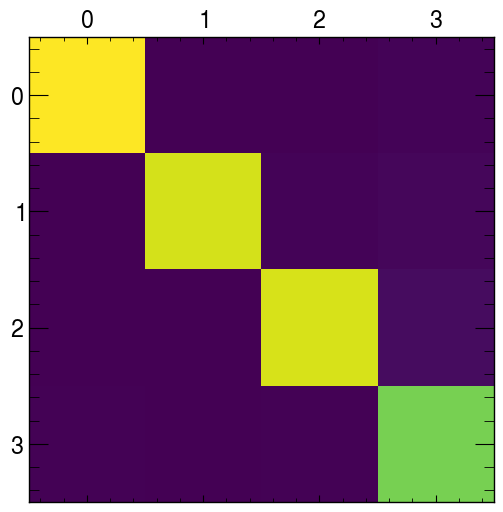

In [382]:
plt.matshow([qq_eff/len(id_ee),ee_eff/len(id_ee),mm_eff/len(id_ee),tt_eff/len(id_ee)])

In [304]:
issue_id_tt = particle_ID_1234(tt_ctrk,tt_sump,tt_ecal,tt_hcal)[1]

In [278]:
def issue_stat(issue_list):
    histogramlist = np.array([0,0,0,0])
    for i in issue_list:
        for j in i:
            histogramlist[j-1] += 1
    return histogramlist
print("qq | ee  | mm |tt")
print(issue_stat(issue_id_tt))


qq | ee  | mm |tt
[ 343  136 1082 1543]
